# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.690018e+01     1.369056e+01
 * time: 0.0017309188842773438
     1     3.492377e+01     6.988489e+00
 * time: 0.004289865493774414
     2     2.364734e+01     2.625852e+00
 * time: 0.010809898376464844
     3     2.070045e+01     2.568877e+00
 * time: 0.016321897506713867
     4     1.970941e+01     1.967348e+00
 * time: 0.022151947021484375
     5     1.916092e+01     1.733844e+00
 * time: 0.02702188491821289
     6     1.889155e+01     1.651611e+00
 * time: 0.056352853775024414
     7     1.840131e+01     1.341023e+00
 * time: 0.06033182144165039
     8     1.809498e+01     1.182833e+00
 * time: 0.06425690650939941
     9     1.781844e+01     1.030208e+00
 * time: 0.06811690330505371
    10     1.764910e+01     6.680467e-01
 * time: 0.07212400436401367
    11     1.752950e+01     8.409712e-01
 * time: 0.07624483108520508
    12     1.749569e+01     1.172425e+00
 * time: 0.07950592041015625
    13     1.739450e+01     8.261544e-01
 

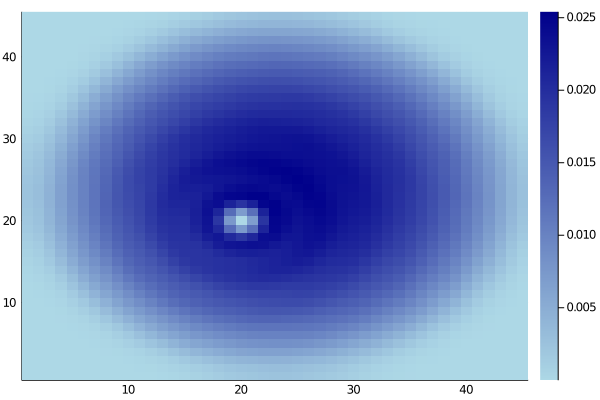

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)